Dataset Information:
Aquaponics meta-data
The enclosed datasets are generated from freshwater aquaponics catfish ponds. The datasets are generated automatically at 5 seconds intervals using the following water quality sensors driven by the ESP 32 microcontroller: Dallas Instrument Temperature sensor (DS18B20), DF Robot Turbidity sensor, DF Robot Dissolved Oxygen sensor, DF Robot pH sensor V2.2, MQ-137 Ammonia sensor, and MQ-135 Nitrate sensor.
The project is funded by the Lacuna Award for Agriculture in Sub-Saharan Africa 2020 under the management of the Meridian Institute Colorado, USA.
The datasets and results in this section were sensor readings from June to mid-October 2021. There are 12 datasets, each from 12 aquaponics catfish ponds. Each of the 12 ponds IoT unit has six sensors (temperature, turbidity, dissolved oxygen, pH, ammonia, nitrate). As of the time of this report each unit has generated over 170,000 instances. The datasets are downloaded at intervals, cleaned, and labelled.

The attributes are:
1) Date/Time
2) Temperature
3) Turbidity
4) Dissolved Oxygen (DO)
5) pH
6) Ammonia
7) Nitrate
8) Population of fish in the pond
9)Length of Fish
10) Weight of Fish

Attribute Information:
All attributes are continuous

No statistics available, but suggest to standardise variables for certain uses (e.g. for use with classifiers that are NOT scale-invariant)

NOTE: Attributes 9 and 10 are class identifiers that can be used differently. For example, one may need to predict the length of the fish using the water quality parameters (2-7) or in addition to the population or stocking density (parameter 8). Similarly, the same can be done using the weight attribute.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df_raw1= pd.read_csv("IoTpond1.csv", delimiter = ",",low_memory=False)

In [4]:
df_raw1.head(5)

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


Lets investigate Pond-1

In [5]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [6]:
df_raw1.describe()

,entry_id,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,83126.000000,83126.000000,83126.000000,83126.000000,83126.000000,8.307400e+04,83126.000000,83126.0,83124.000000,83124.00000
mean,84018.144516,24.573376,87.490160,12.390251,7.518329,2.030817e+08,458.294408,50.0,16.414686,44.56847
std,53579.484245,0.861532,25.859375,12.518253,0.534787,7.866231e+09,338.313206,0.0,5.272244,33.21549
min,1889.000000,-127.000000,1.000000,0.007000,-0.586270,6.770000e-03,45.000000,50.0,7.110000,2.91000
25%,24902.250000,24.125000,91.000000,3.440000,7.153520,4.584200e-01,146.000000,50.0,11.790000,14.19000
50%,103478.500000,24.562500,100.000000,7.133000,7.357790,6.116600e-01,347.000000,50.0,18.080000,54.70000
75%,131074.750000,24.937500,100.000000,15.819000,7.838980,1.558803e+01,823.000000,50.0,21.000000,67.52000
max,247405.000000,27.750000,100.000000,41.046000,8.551670,4.270000e+11,1936.000000,50.0,33.450000,318.64000


There are some missing data - Ammonia & Fish_Length & Fish_Weight

In [7]:
df_raw1.dtypes

created_at           object
entry_id              int64
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

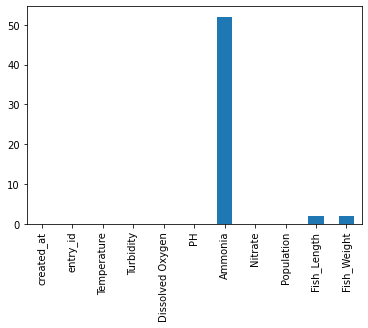

In [8]:
df_raw1.isna().sum().plot.bar()

In [9]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [10]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [11]:
df_raw1.drop(columns='entry_id', axis=1,inplace=True)

In [12]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [13]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91,2021-06-19 00:00:05,2021-06-19,00:00:05
1,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91,2021-06-19 00:01:02,2021-06-19,00:01:02
2,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91,2021-06-19 00:01:22,2021-06-19,00:01:22
3,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91,2021-06-19 00:01:44,2021-06-19,00:01:44
4,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91,2021-06-19 00:02:07,2021-06-19,00:02:07


In [14]:
df_na = df_raw1.drop('Date', axis = 1).isna().groupby(df_raw1.Date, sort = False).sum().reset_index()

<AxesSubplot:xlabel='Date'>

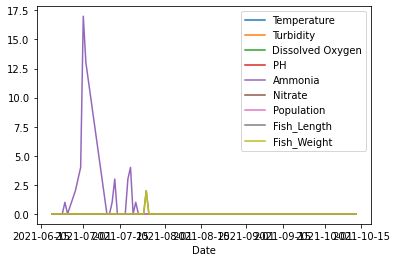

In [15]:
df_na.plot(x='Date', y=['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight'])


We can see that only Ammonia has missing data and Fish weight has missing data.We can either drop the whole Ammonia missing records or impute them with the last reading . Fish weight too.

Sort DataFrame by Date (Datetime)

In [16]:
df=df_raw1.sort_values(by='Datetime') 

In [18]:
df_raw1 = df_raw1.dropna()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

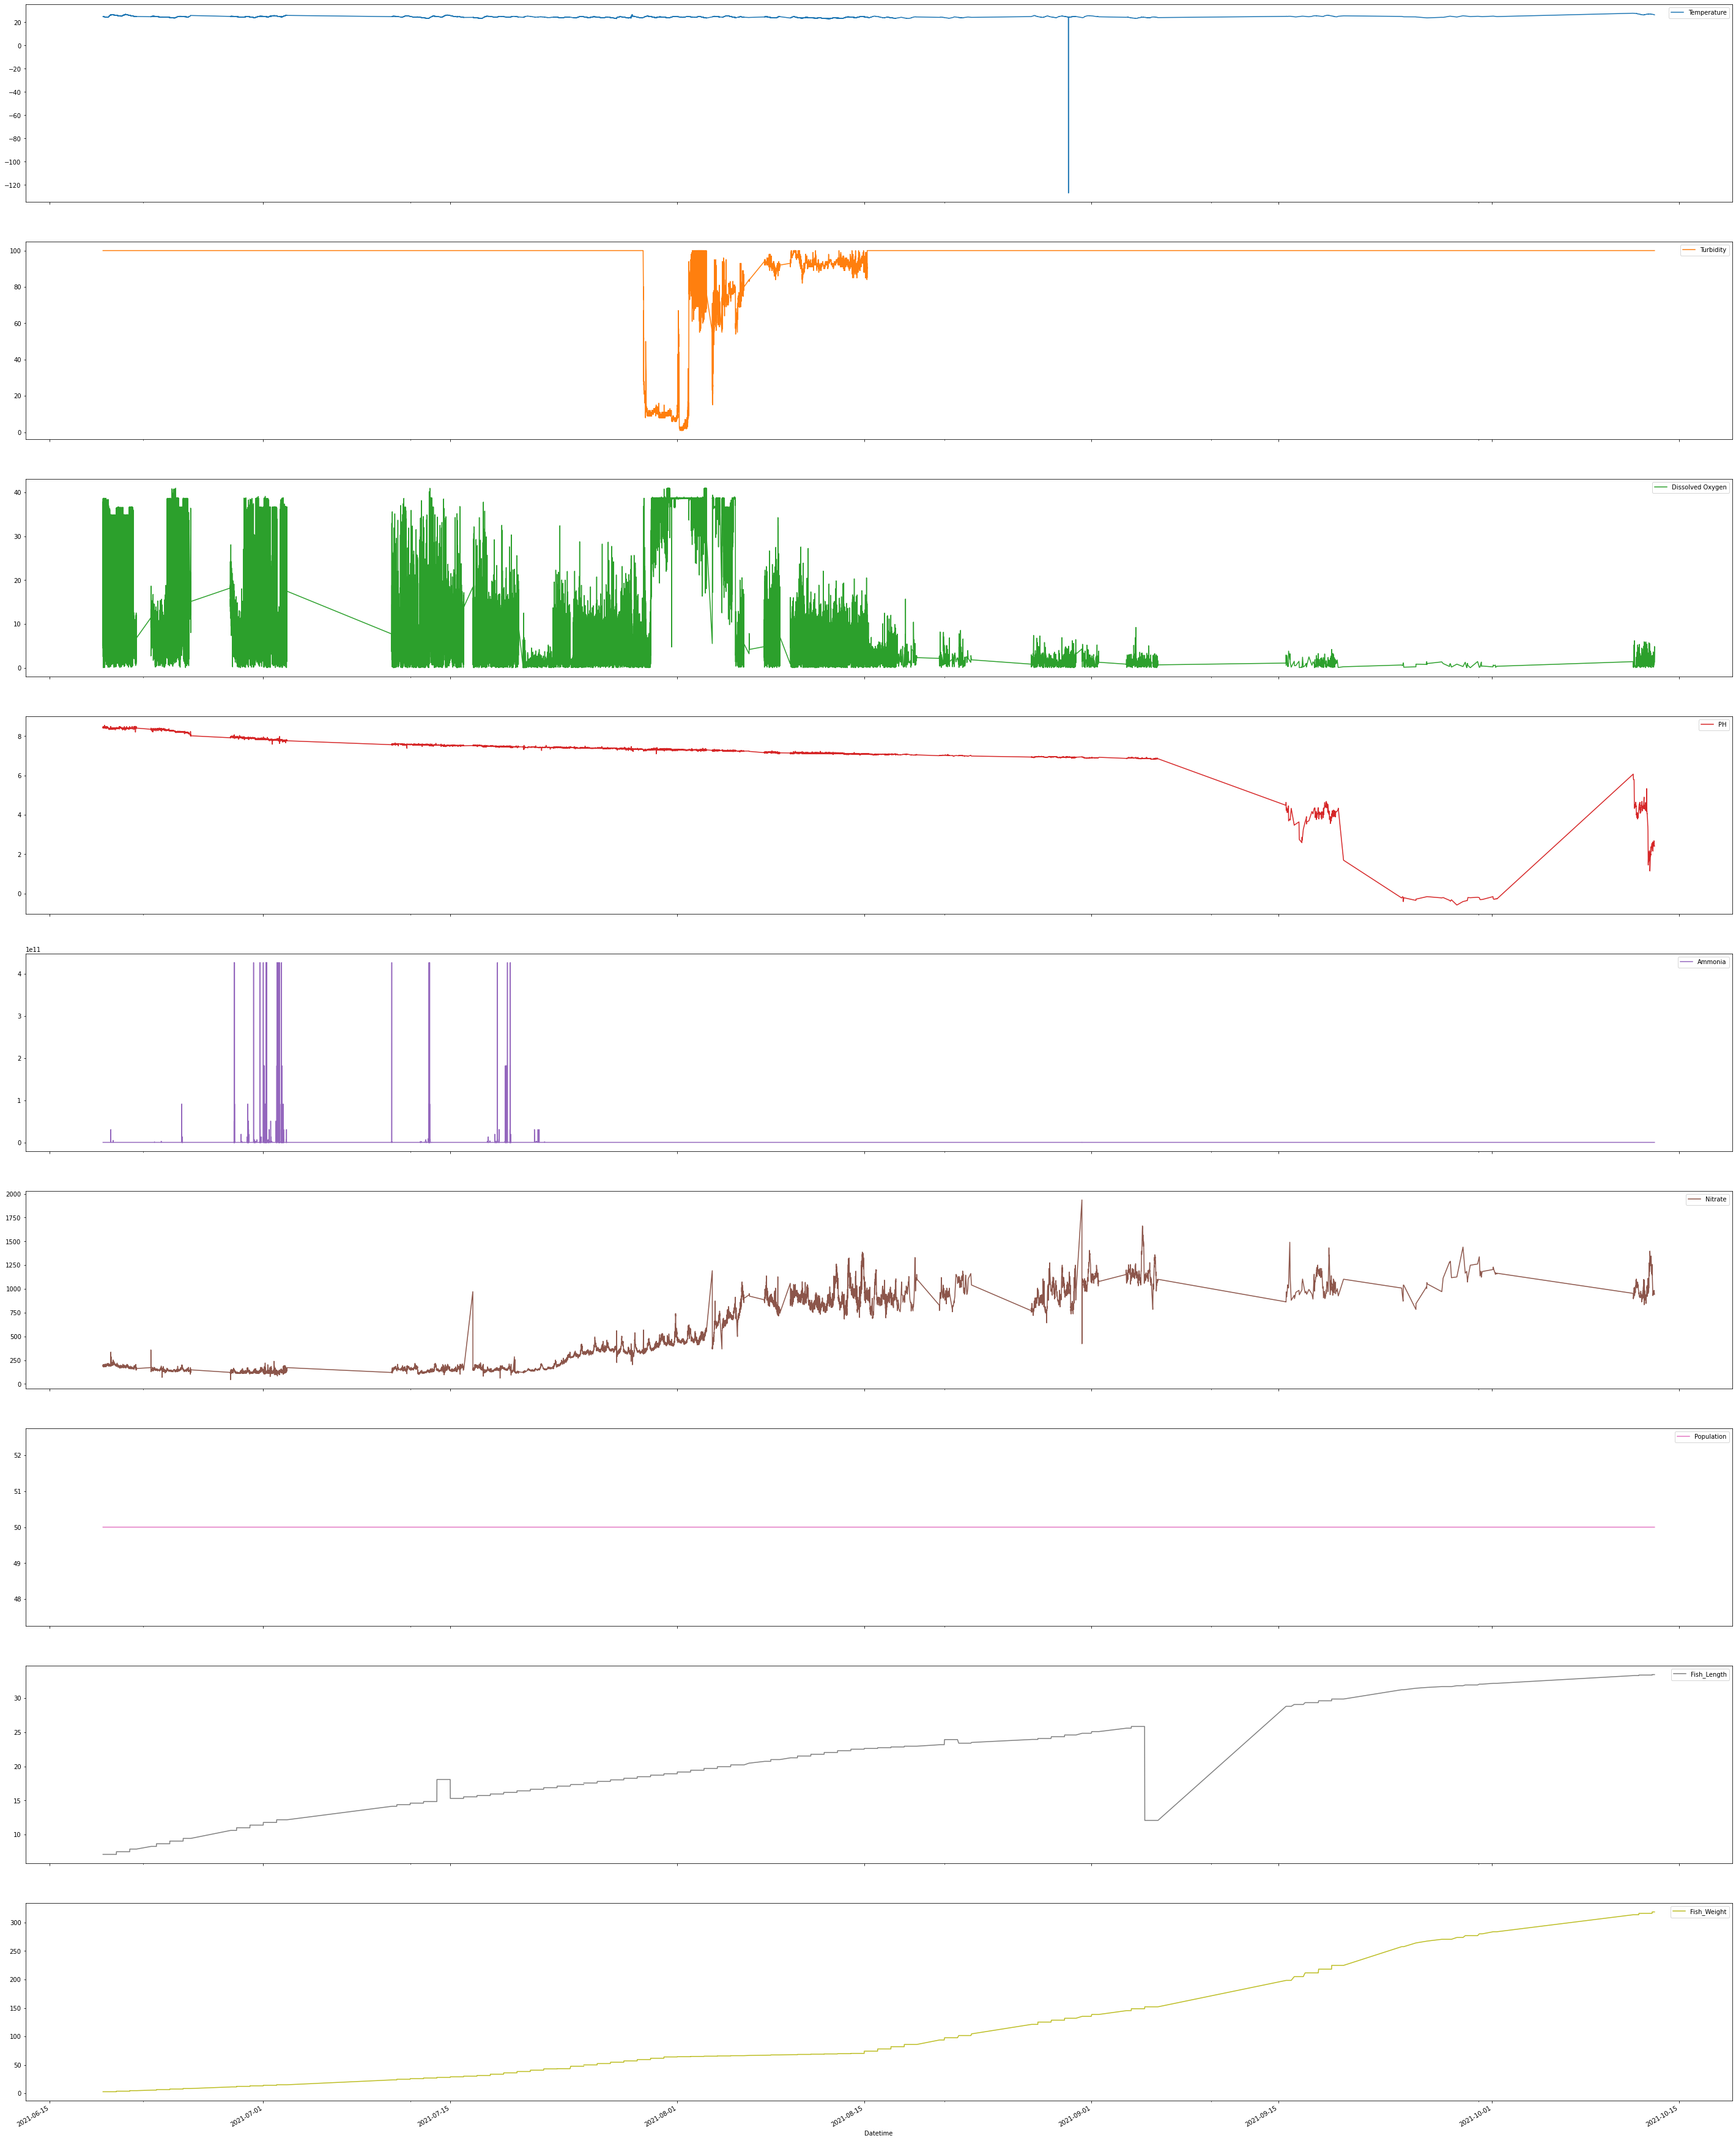

In [19]:
df.plot('Datetime',['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight'], subplots = True, figsize = (50,70))

Data Covariance and Correlation

In [20]:
corr = df.corr()
corr

<ipython-input-20-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
Temperature,1.000000,0.074851,0.098471,0.302396,0.004518,-0.372848,NaN,-0.420202,-0.296245
Turbidity,0.074851,1.000000,-0.623257,0.222365,0.012494,-0.124817,NaN,-0.280379,-0.284288
Dissolved Oxygen,0.098471,-0.623257,1.000000,0.005331,-0.008908,-0.101519,NaN,0.017555,0.042217
PH,0.302396,0.222365,0.005331,1.000000,0.011413,-0.695454,NaN,-0.894844,-0.919007
Ammonia,0.004518,0.012494,-0.008908,0.011413,1.000000,-0.024755,NaN,-0.018230,-0.020203
Nitrate,-0.372848,-0.124817,-0.101519,-0.695454,-0.024755,1.000000,NaN,0.839422,0.796033
Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fish_Length,-0.420202,-0.280379,0.017555,-0.894844,-0.018230,0.839422,NaN,1.000000,0.899431
Fish_Weight,-0.296245,-0.284288,0.042217,-0.919007,-0.020203,0.796033,NaN,0.899431,1.000000


<AxesSubplot:>

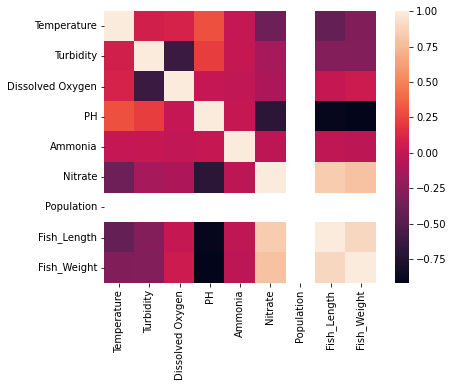

In [21]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

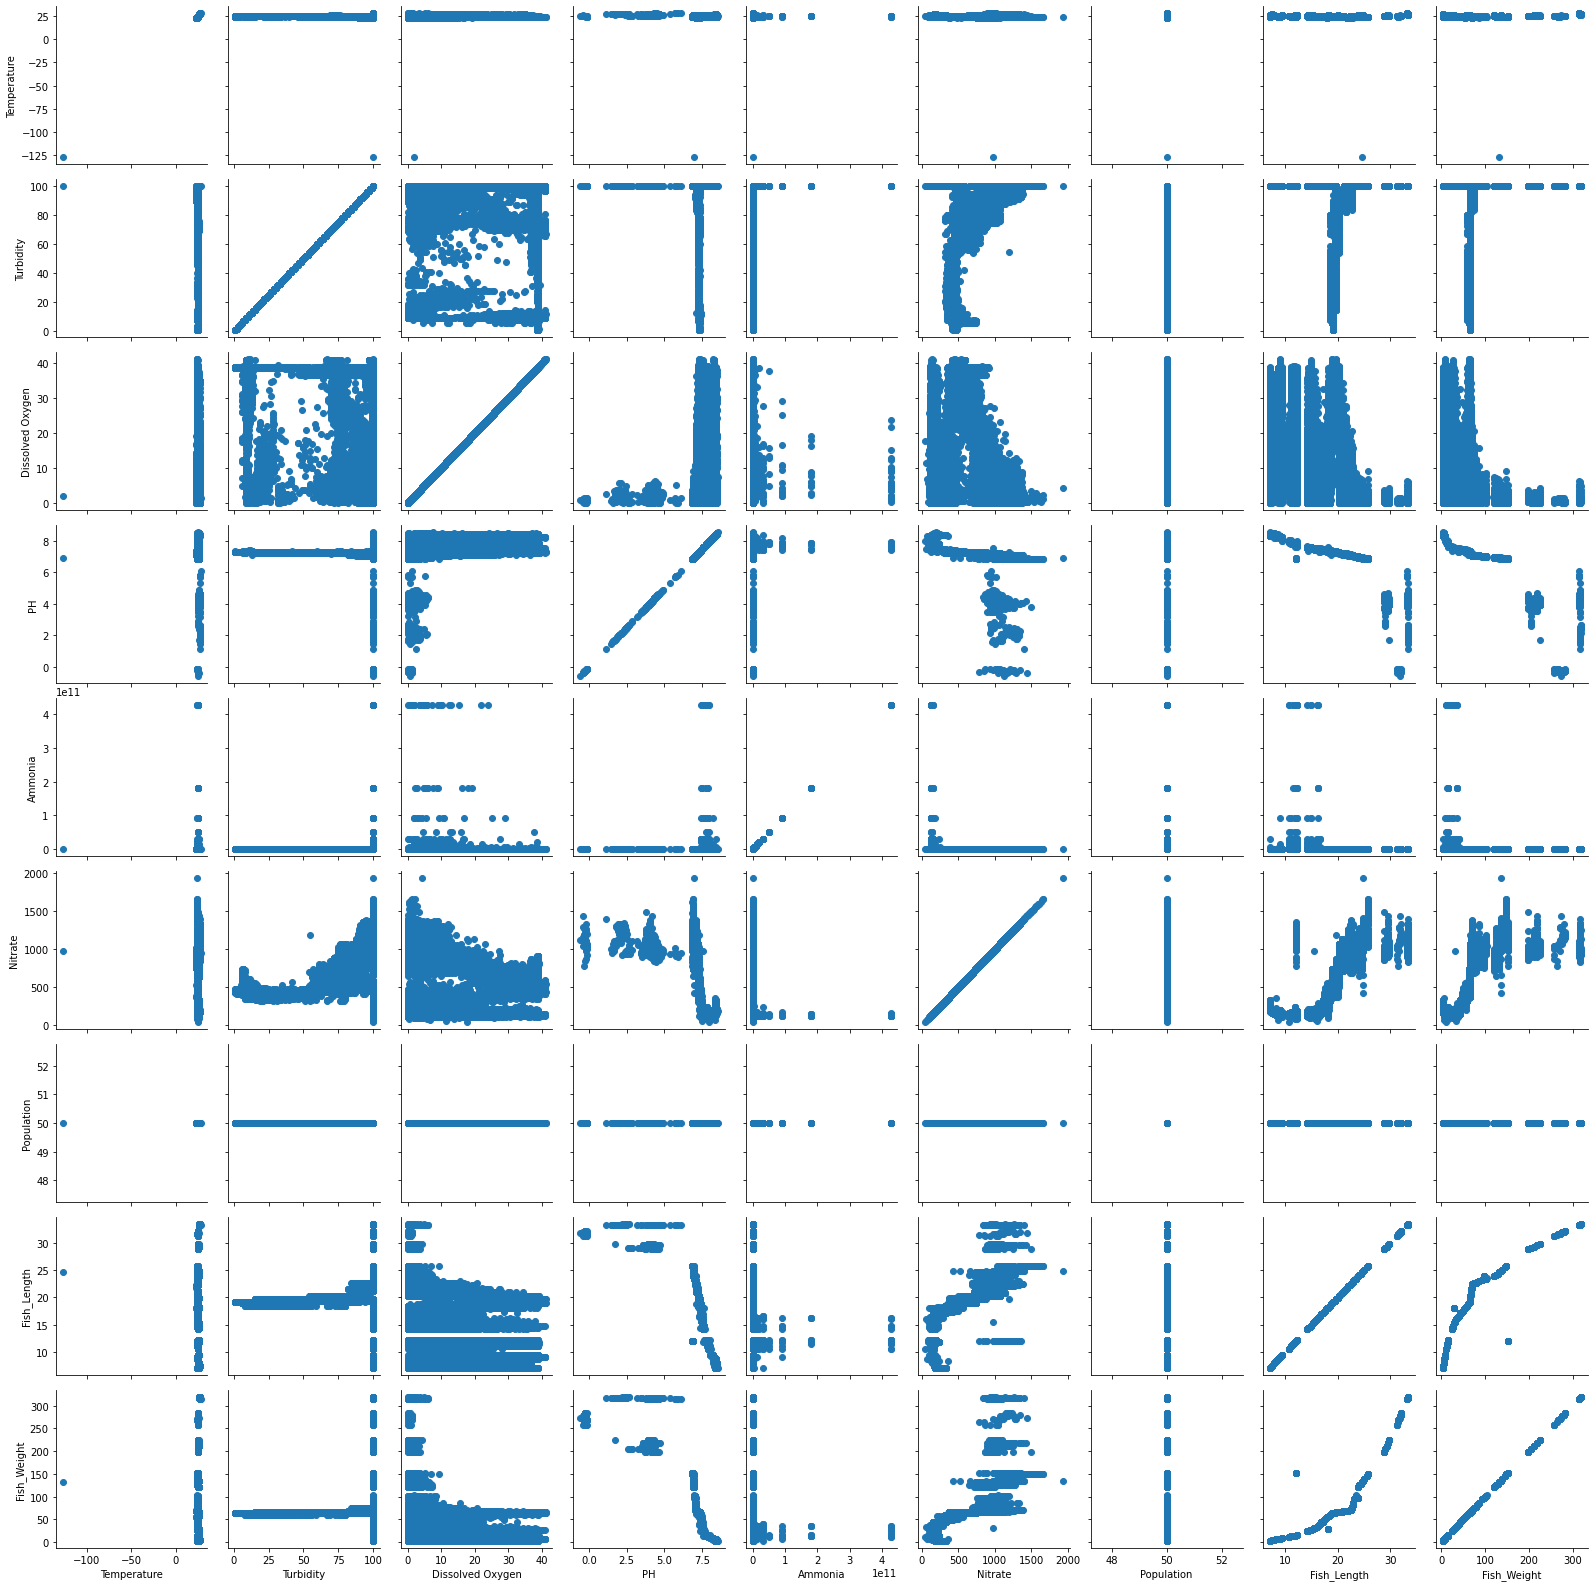

In [22]:
g = sns.PairGrid(df)
g.map(plt.scatter)

In [23]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,83126.0000,83126.0000,83126.0000,83126.0000,83074.0000,83126.0000,83126.0000,83124.0000,83124.0000,83126
mean,24.5734,87.4902,12.3903,7.5183,203081663.9666,458.2944,50.0000,16.4147,44.5685,2021-07-21 16:09:26.662151424
min,-127.0000,1.0000,0.0070,-0.5863,0.0068,45.0000,50.0000,7.1100,2.9100,2021-06-19 00:00:05
25%,24.1250,91.0000,3.4400,7.1535,0.4584,146.0000,50.0000,11.7900,14.1900,2021-07-01 01:54:57.750000128
50%,24.5625,100.0000,7.1330,7.3578,0.6117,347.0000,50.0000,18.0800,54.7000,2021-07-27 17:36:44
75%,24.9375,100.0000,15.8190,7.8390,15.5880,823.0000,50.0000,21.0000,67.5200,2021-08-08 13:36:09
max,27.7500,100.0000,41.0460,8.5517,427000000000.0000,1936.0000,50.0000,33.4500,318.6400,2021-10-13 04:14:22
std,0.8615,25.8594,12.5183,0.5348,7866230860.5845,338.3132,0.0000,5.2722,33.2155,NaN


In [24]:
len(df["Fish_Weight"].unique())

82

In [25]:
a=df["Fish_Weight"].unique()
a

array([  2.91,   3.85,   4.79,   5.73,   6.67,   7.61,   8.55,  11.37,
        12.31,  13.25,  14.19,  15.13,  23.73,  24.82,  25.91,  26.97,
        28.03,  29.12,  30.21,  31.4 ,  33.73,  36.06,  38.39,  40.72,
        43.05,  43.38,  47.71,    nan,  50.04,  52.37,  54.7 ,  57.03,
        59.36,  61.69,  64.  ,  64.44,  64.88,  65.32,  65.76,  66.2 ,
        66.64,  67.08,  67.52,  67.96,  68.4 ,  68.84,  69.28,  69.72,
        70.2 ,  74.13,  78.05,  81.97,  85.89,  93.75,  97.65, 101.57,
       104.49, 121.17, 125.2 , 128.55, 131.9 , 135.25, 138.6 , 145.3 ,
       148.65, 152.  , 198.42, 205.  , 211.58, 218.16, 224.74, 257.64,
       264.2 , 267.39, 270.58, 273.77, 276.96, 280.15, 283.84, 313.72,
       316.18, 318.64])

In [26]:
d=df["Date"].unique()

In [27]:
start=a[0]
print(d[0])
for i in range(len(a)-1):
    print(i)
    print(d[i+1],'-----------',a[i+1]-start)
    start=a[i+1]

2021-06-19
0
2021-06-20 ----------- 0.94
1
2021-06-21 ----------- 0.94
2
2021-06-22 ----------- 0.9400000000000004
3
2021-06-23 ----------- 0.9399999999999995
4
2021-06-24 ----------- 0.9400000000000004
5
2021-06-25 ----------- 0.9400000000000004
6
2021-06-28 ----------- 2.8199999999999985
7
2021-06-29 ----------- 0.9400000000000013
8
2021-06-30 ----------- 0.9399999999999995
9
2021-07-01 ----------- 0.9399999999999995
10
2021-07-02 ----------- 0.9400000000000013
11
2021-07-10 ----------- 8.6
12
2021-07-11 ----------- 1.0899999999999999
13
2021-07-12 ----------- 1.0899999999999999
14
2021-07-13 ----------- 1.0599999999999987
15
2021-07-14 ----------- 1.0600000000000023
16
2021-07-15 ----------- 1.0899999999999999
17
2021-07-16 ----------- 1.0899999999999999
18
2021-07-17 ----------- 1.1899999999999977
19
2021-07-18 ----------- 2.3299999999999983
20
2021-07-19 ----------- 2.3300000000000054
21
2021-07-20 ----------- 2.3299999999999983
22
2021-07-21 ----------- 2.3299999999999983
23
2021

IndexError: index 81 is out of bounds for axis 0 with size 81

In [28]:
len(df["Date"].unique())

81

In [29]:
f=df[df["Date"]==d[58]]

#use datetime_is_numeric = True to get statistics on the datetime column
desc = f.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,165.0000,165.0000,165.0000,165.0000,165.0000,165.0000,165.0000,165.0000,165.0000,165
mean,24.6352,100.0000,1.2424,6.9310,1.4288,1005.6121,50.0000,24.3500,128.5500,2021-08-29 12:18:42.981818112
min,23.8750,100.0000,0.0080,6.8902,0.2867,811.0000,50.0000,24.3500,128.5500,2021-08-29 00:18:38
25%,24.1875,100.0000,0.5490,6.9220,1.1129,933.0000,50.0000,24.3500,128.5500,2021-08-29 05:25:50
50%,24.5000,100.0000,1.0330,6.9311,1.3909,1008.0000,50.0000,24.3500,128.5500,2021-08-29 11:28:37
75%,25.1250,100.0000,1.7410,6.9447,1.8378,1072.0000,50.0000,24.3500,128.5500,2021-08-29 19:12:15
max,25.3125,100.0000,6.8880,6.9583,2.7375,1250.0000,50.0000,24.3500,128.5500,2021-08-29 23:57:24
std,0.5008,0.0000,0.9655,0.0161,0.5207,93.3207,0.0000,0.0000,0.0000,NaN


array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>],
      dtype=object)

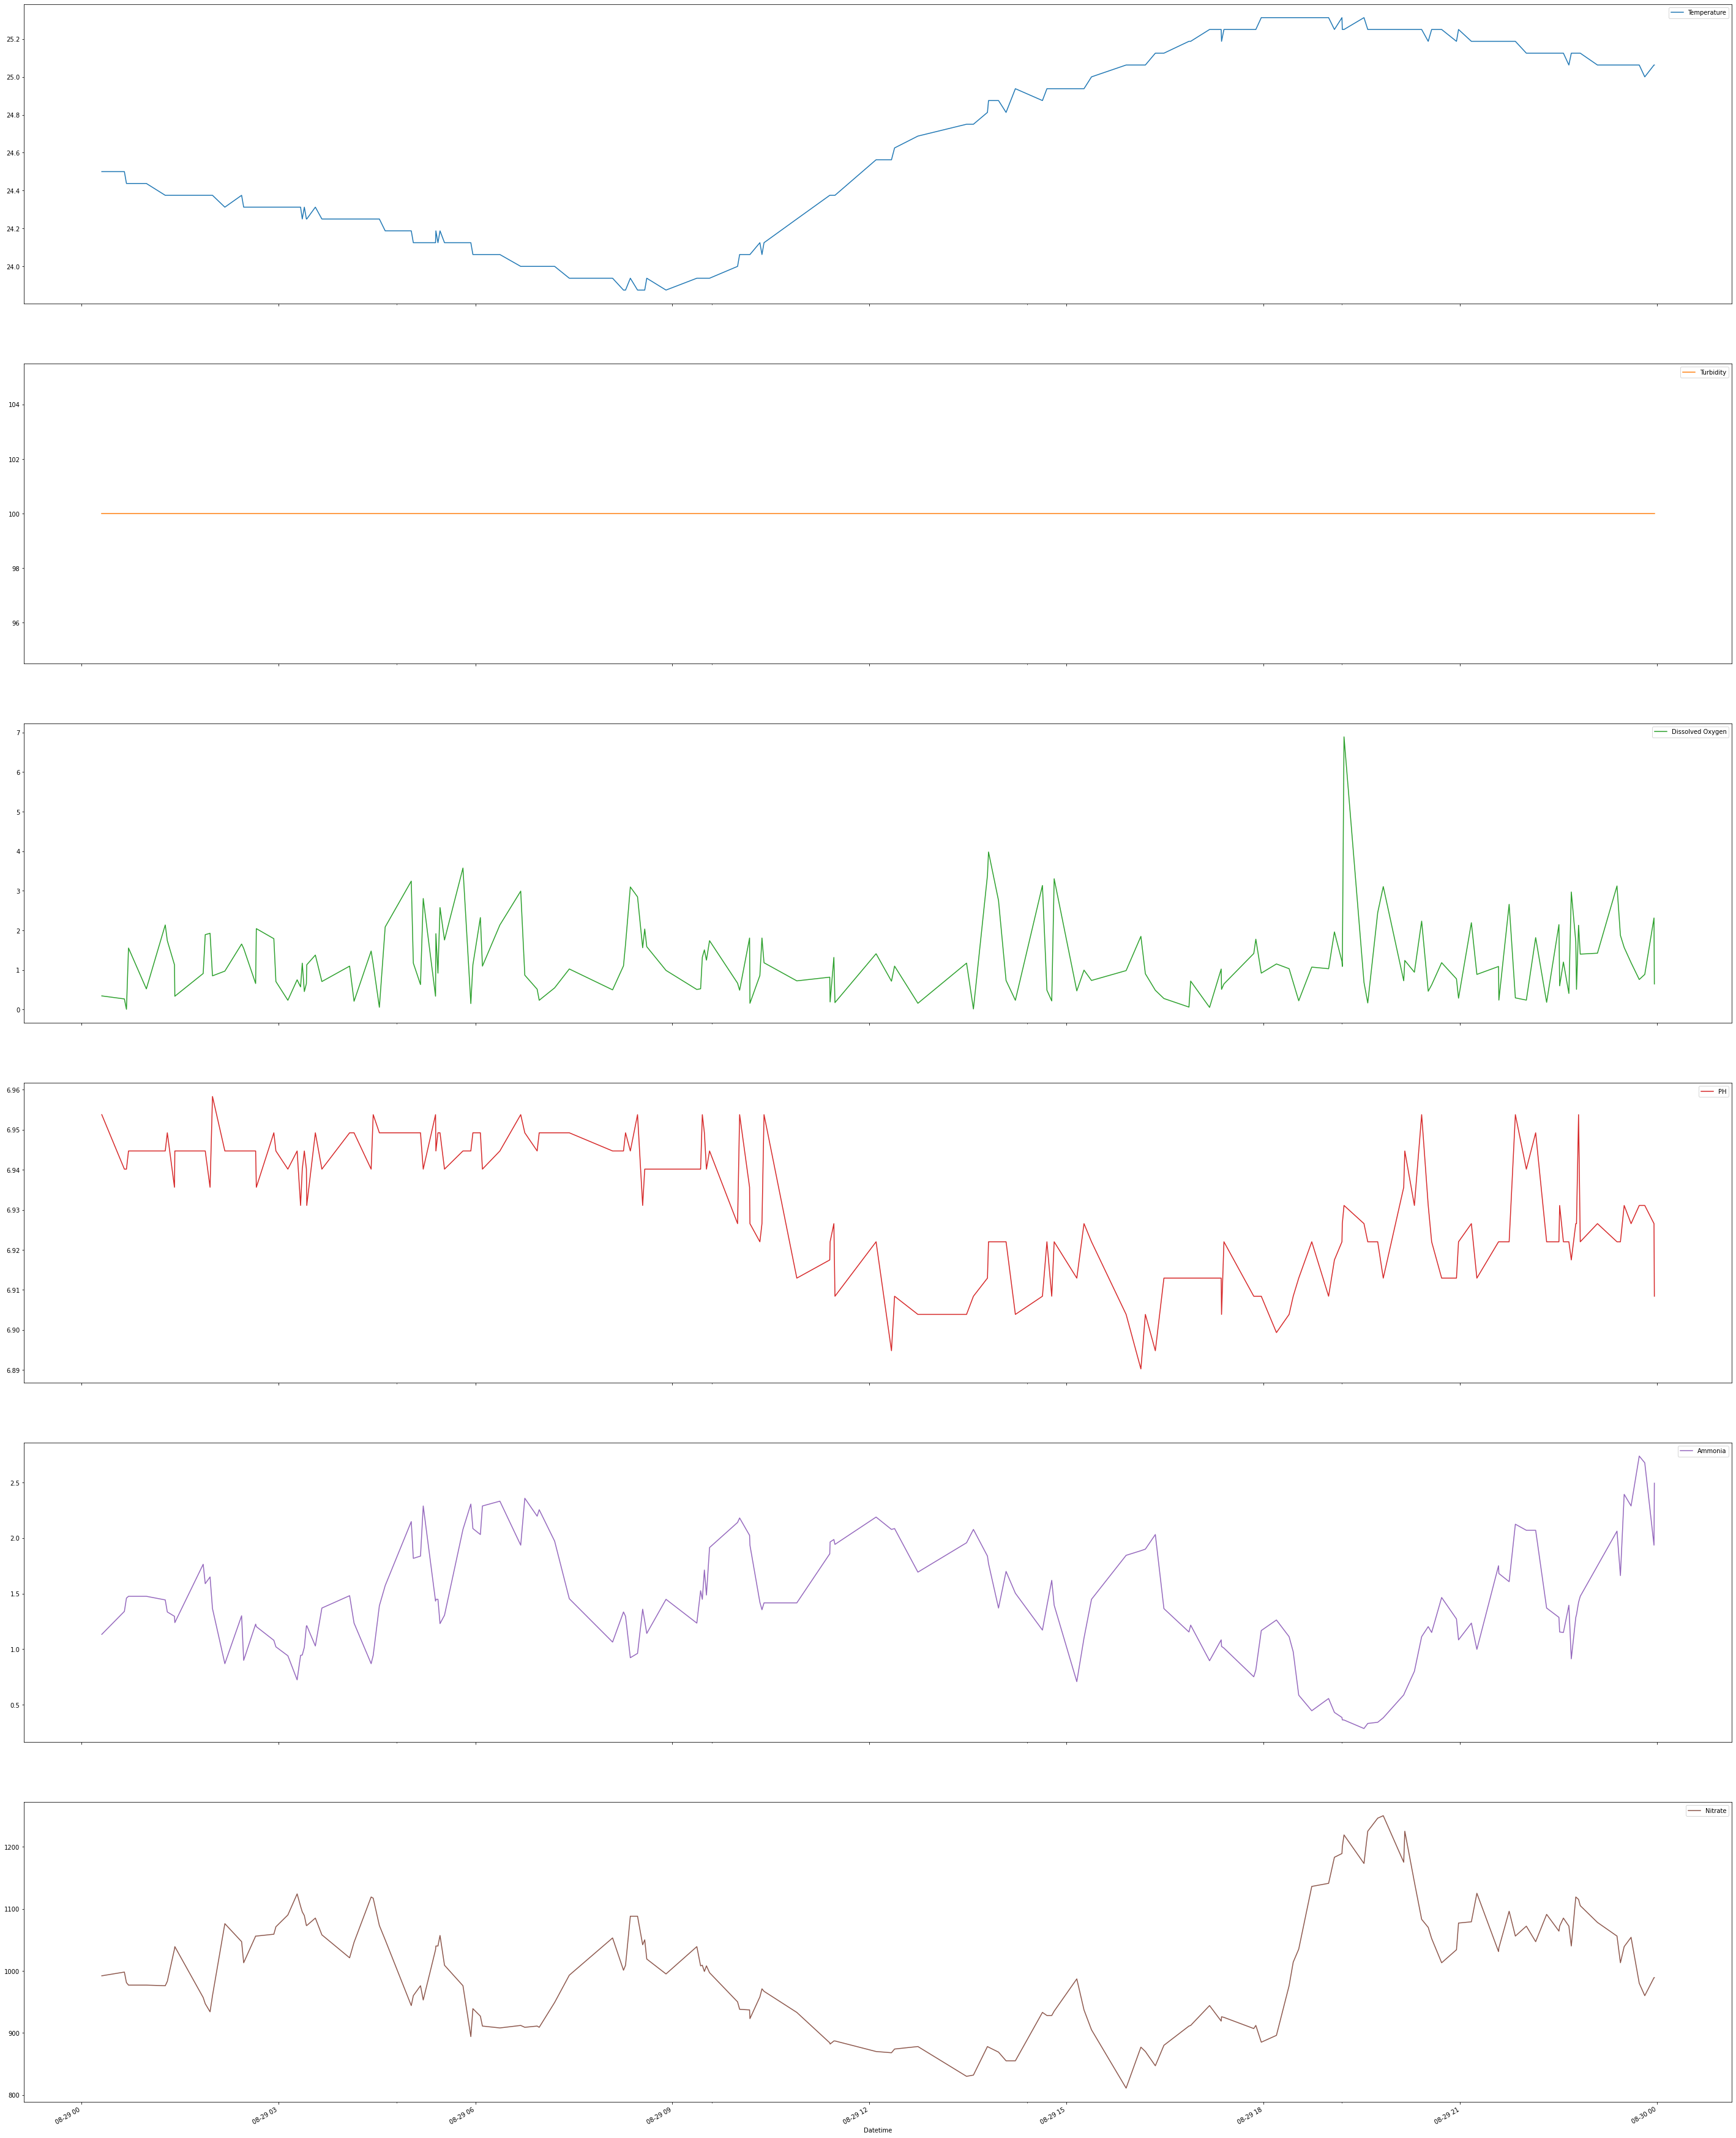

In [30]:
f.plot('Datetime',['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate'], subplots = True, figsize = (50,70))

In [31]:
df.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,83126.000000,83126.000000,83126.000000,83126.000000,8.307400e+04,83126.000000,83126.0,83124.000000,83124.00000
mean,24.573376,87.490160,12.390251,7.518329,2.030817e+08,458.294408,50.0,16.414686,44.56847
std,0.861532,25.859375,12.518253,0.534787,7.866231e+09,338.313206,0.0,5.272244,33.21549
min,-127.000000,1.000000,0.007000,-0.586270,6.770000e-03,45.000000,50.0,7.110000,2.91000
25%,24.125000,91.000000,3.440000,7.153520,4.584200e-01,146.000000,50.0,11.790000,14.19000
50%,24.562500,100.000000,7.133000,7.357790,6.116600e-01,347.000000,50.0,18.080000,54.70000
75%,24.937500,100.000000,15.819000,7.838980,1.558803e+01,823.000000,50.0,21.000000,67.52000
max,27.750000,100.000000,41.046000,8.551670,4.270000e+11,1936.000000,50.0,33.450000,318.64000


<AxesSubplot:xlabel='Temperature'>

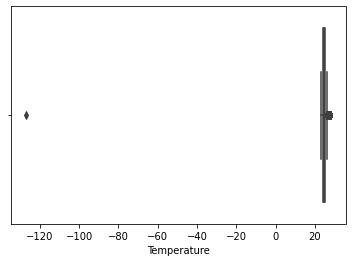

In [32]:
sns.boxplot(x=df['Temperature'])

<AxesSubplot:xlabel='Turbidity'>

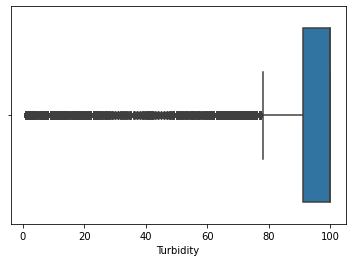

In [33]:
sns.boxplot(x=df['Turbidity'])

<AxesSubplot:xlabel='Dissolved Oxygen'>

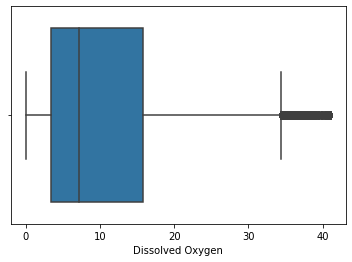

In [34]:
sns.boxplot(x=df['Dissolved Oxygen'])

<AxesSubplot:xlabel='PH'>

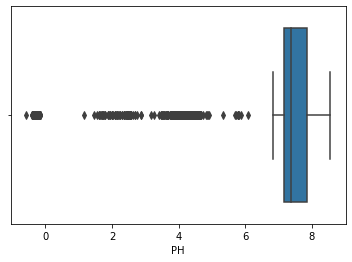

In [35]:
sns.boxplot(x=df['PH'])

<AxesSubplot:xlabel='Ammonia'>

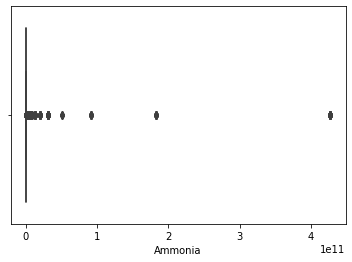

In [36]:
sns.boxplot(x=df['Ammonia'])

<AxesSubplot:xlabel='Nitrate'>

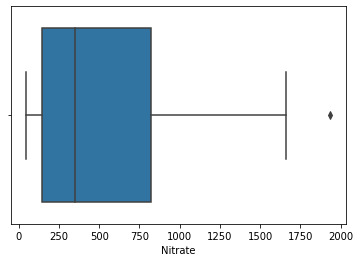

In [37]:
sns.boxplot(x=df['Nitrate'])

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

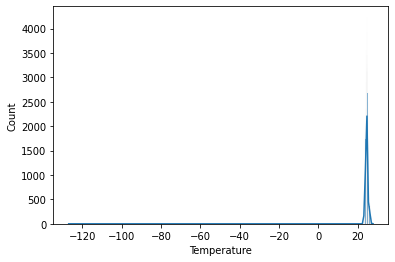

In [38]:
# plot a histogram of a variable in the dataframe
sns.histplot(df['Temperature'], kde=True)

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

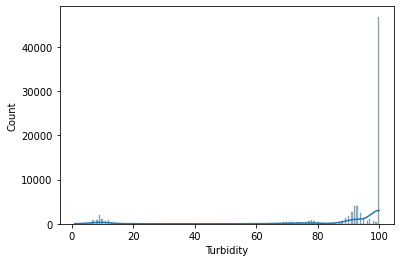

In [39]:
sns.histplot(df['Turbidity'], kde=True)

<AxesSubplot:xlabel='Dissolved Oxygen', ylabel='Count'>

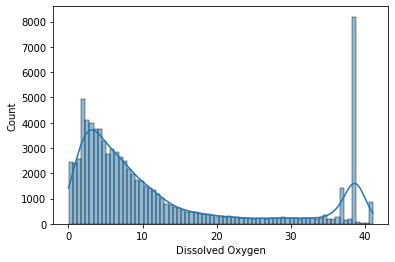

In [40]:
sns.histplot(df['Dissolved Oxygen'], kde=True)

<AxesSubplot:xlabel='PH', ylabel='Count'>

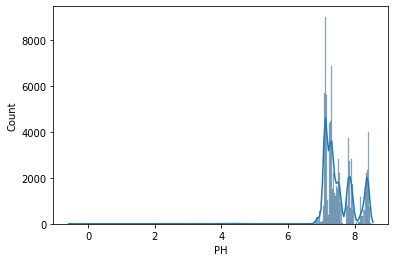

In [41]:
sns.histplot(df['PH'], kde=True)

<AxesSubplot:xlabel='Nitrate', ylabel='Count'>

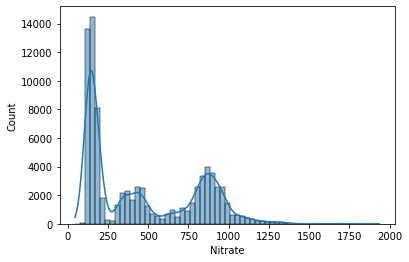

In [43]:
sns.histplot(df['Nitrate'], kde=True)